In [1]:
## Business Problem
#### Digital advertising platforms try to optimize conversion ratios by presenting them different offerşng strategies.
#### Short time ago, a new method was declared which is named "average bidding" as an alternative to the "maximum bidding" model

##### One of our clients veridunya.com decided to test this new model, whether it is more efiicient or not.
#####

In [ ]:
## Dataset Explanations
###

In [71]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
import openpyxl

In [13]:
file_path = r"C:\Users\ozkan\OneDrive\Desktop\GIT\odev\ab_test_data.xlsx"

In [39]:
df1 = pd.read_excel(file_path, sheet_name = "Control Group")

In [41]:
df2 = pd.read_excel(file_path, sheet_name = "Test Group")

In [25]:
##### Control Group - df1 - Basic Statistics

df1.describe().T
# Purchase için ortalama 550, std 134 (yüksek), max-min aralığı da oldukça geniş denebilir

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


In [69]:
df_conf = df1.describe().T
df_conf["conf_interv"] = df_conf.apply(lambda row: (row["mean"] - 1.96 * row["std"], row["mean"] + 1.96 * row["std"]), axis=1)
## %95 güven aralığı için Z dağılım skoru olan 1.96 katsayısını kullandık.

In [65]:
df_conf

,count,mean,std,min,25%,50%,75%,max,conf_interv
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633,"(61919.21965844013, 141503.67847695443)"
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507,"(2493.8857959837514, 7707.428949170806)"
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502,"(288.0419842884464, 813.7461332520168)"
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522,"(1314.8494451953893, 2502.2871544101085)"


In [71]:
# T-Dağılımı %95 güven aralığına göre hesaplama yaparken yüksek standart sapma ve max-min aralığının yüksek olması güvenilirliği azaltır.
sms.DescrStatsW(df1["Purchase"]).tconfint_mean()

(508.00417525045305, 593.7839422900101)

In [73]:
df1.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


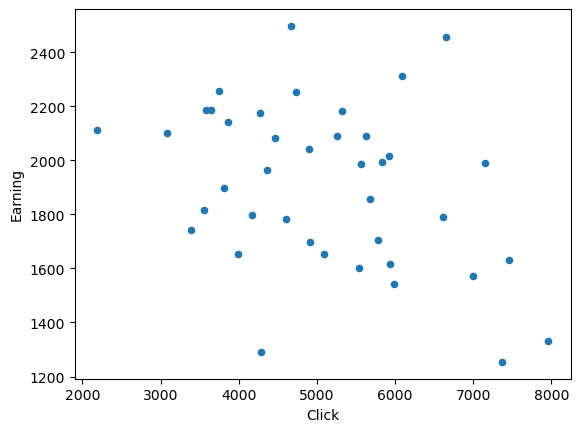

In [81]:
# -0,36 negatif korelasyon bulunmakta. 
df1.plot.scatter("Click", "Earning")
plt.show()

In [83]:
df1["Click"].corr(df1["Earning"])

-0.3566898131694894

In [1]:
### df2 veri seti ###### Test Group ####

In [7]:
import pandas as pd

In [9]:
file_path = r"C:\Users\ozkan\OneDrive\Desktop\GIT\odev\ab_test_data.xlsx"

In [11]:
df2 = pd.read_excel(file_path, sheet_name = "Test Group")

In [13]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0,120512.411758,18807.448712,79033.834921,112691.970770,119291.300775,132050.578933,158605.920483
Click,40.0,3967.549761,923.095073,1836.629861,3376.819024,3931.359804,4660.497911,6019.695079
Purchase,40.0,582.106097,161.152513,311.629515,444.626828,551.355732,699.862360,889.910460
Earning,40.0,2514.890733,282.730852,1939.611243,2280.537426,2544.666107,2761.545405,3171.489708


In [31]:
sms.DescrStatsW(df2["Purchase"]).tconfint_mean()

(530.5670224874668, 633.6451708094685)

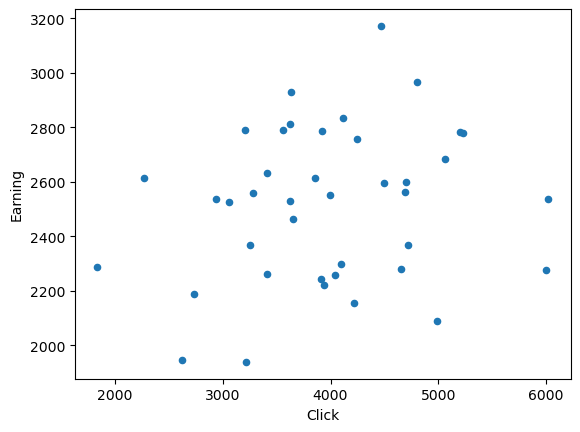

In [21]:
df2.plot.scatter("Click", "Earning")
plt.show()


In [29]:
# Test Grubu'nda korelasyon artı yönde, düşük de olsa
df2["Click"].corr(df2["Earning"])

0.1977789201556498

In [33]:
## Gruplar arasında ciddi bir farklılık bulunmamaktadır. 

In [35]:
## Grupların concat metdodu ile birleştirilmesi

In [43]:
df_combined = pd.concat([df1, df2], axis=0)

In [45]:
df_combined

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018
...,...,...,...,...
35,79234.91193,6002.21358,382.04712,2277.86398
36,130702.23941,3626.32007,449.82459,2530.84133
37,116481.87337,4702.78247,472.45373,2597.91763
38,79033.83492,4495.42818,425.35910,2595.85788


In [47]:
df_combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,80.00000,111111.93041,21623.80775,45475.94296,95063.86063,114037.03500,124138.65239,158605.92048
Click,80.00000,4534.10357,1272.37607,1836.62986,3632.89183,4321.60283,5272.61606,7959.12507
Purchase,80.00000,566.50008,148.14184,267.02894,458.13788,532.12508,679.55760,889.91046
Earning,80.00000,2211.72952,421.70058,1253.98952,1945.71316,2205.53626,2541.37752,3171.48971


In [49]:
sms.DescrStatsW(df_combined["Purchase"]).tconfint_mean()

(533.5327261657591, 599.46742925294)

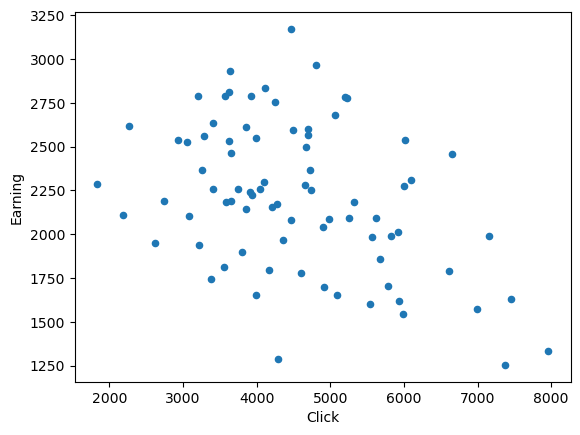

In [53]:
df_combined.plot.scatter("Click", "Earning")
plt.show()

In [55]:
df_combined["Click"].corr(df_combined["Earning"])

-0.4088821145697514

In [57]:
## Dağılım verileri genel olarak birbirine yakın görünmektedir. Kombine korelasyon verisi ise 1'e yakınsasa da korelasyon bulunmamaktadır.

In [59]:
##############################################################################

In [61]:
#####################################  A/B Testi  ############################

In [65]:
##H0 "Ortalama Teklif (Average Bidding) yöntemi, Maksimum Teklif (Maximum Bidding) yöntemiyle aynı satın alma ve gelir değerlerini üretir."
#(İki grup arasında anlamlı bir fark yoktur.)


##H1 ""Ortalama Teklif (Average Bidding) yöntemi, Maksimum Teklif (Maximum Bidding) yöntemine göre daha yüksek satın alma ve gelir üretir."
#(İki grup arasında anlamlı bir fark vardır.)


##İlk Olarak Shapiro -Wilk

In [75]:
test_stat1, pvalue1 = shapiro(df1["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat1, pvalue1))

Test Stat = 0.9773, p-value = 0.5891


In [77]:
#P-value > 0.05 H0 reddedilemez ve veri normal dağılmaktadır.

In [79]:
test_stat2, pvalue2 = shapiro(df2["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat2, pvalue2))

Test Stat = 0.9589, p-value = 0.1541


In [81]:
# P-value > 0.05 H0 reddedilemez ve veri normal dağılmaktadır.

In [83]:
## 2 Grup da normal dağılıma uyuyor, T-Testi yapılabilir.

In [85]:
## T-Testi uygulayabilmek için iki grubun varyanslarının eşit olup olmadığını kontrol etmeliyiz. Levene Testi uygulamalıyız.

In [87]:
levene_test = levene(df1["Purchase"], df2["Purchase"])

print(f"Levene Testi: Test İstatistiği = {levene_test[0]}, p-değeri = {levene_test[1]}")

Levene Testi: Test İstatistiği = 2.6392694728747363, p-değeri = 0.10828588271874791


In [91]:
test_stat, pvalue = levene(df1["Purchase"], df2["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


In [95]:
## Levene Testine Göre;
## P-value > 0,.05 H0 reddedilemez ve varyanslar homojendir.
## Bu durumda T-testi uygulanır.

In [104]:
t_stat, p_value = ttest_ind(df1["Purchase"], df2["Purchase"], equal_var=(levene_pvalue > 0.05))

print(f"T-Test Sonucu: Test İstatistiği = {t_stat:.4f}, p-value = {p_value:.4f}")

T-Test Sonucu: Test İstatistiği = -0.9416, p-value = 0.3493


In [ ]:
## P-value > 0.05 H0 reddedilemez yani istatiksel olarak anlamlı bir fark yoktur.
## Ancak test statistics Negatif olması, kontrol grubunun (Maximum Bidding) ortalamasının 
## test grubundan (Average Bidding) biraz daha yüksek olduğunu gösterir.

In [97]:
test_stat, pvalue = mannwhitneyu(df1["Purchase"], df2["Purchase"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 723.0000, p-value = 0.4617


In [116]:
## Mann-Whitney U testine göre;
## P-Value > 0.05 H0 reddedilemez ve iki grup arasında anlamlı bir fark yoktur.

In [ ]:
## Alternatif Test ## Earning ############################################################

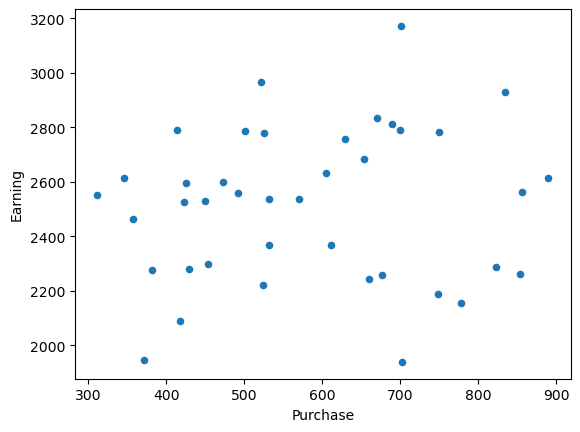

In [108]:
df_combined.plot.scatter("Purchase", "Earning")
plt.show()

In [118]:
df_combined["Purchase"].corr(df_combined["Earning"])

0.1334061725859247

In [126]:
test_stat, pvalue = shapiro(df1["Earning"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9756, p-value = 0.5306


In [128]:
test_stat, pvalue = shapiro(df2["Earning"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9780, p-value = 0.6163


In [122]:
levene_test = levene(df1["Earning"], df2["Earning"])

print(f"Levene Testi: Test İstatistiği = {levene_test[0]}, p-değeri = {levene_test[1]}")

Levene Testi: Test İstatistiği = 0.35323781392537446, p-değeri = 0.5540060067717659


In [130]:
t_stat, p_value = ttest_ind(df1["Earning"], df2["Earning"], equal_var=(levene_pvalue > 0.05))

print(f"T-Test Sonucu: Test İstatistiği = {t_stat:.4f}, p-value = {p_value:.4f}")

T-Test Sonucu: Test İstatistiği = -9.2545, p-value = 0.0000


In [ ]:
### Sahpiro ve Levene Testi 
### p > 0.05 H0 Reddedilir ve veriler normal dağılmaktadır.
### T-testine geçtiğimzde ise p < 0.05 ve test statistic -9.2545 olması;
### Max biding Earning'de Av biding'e göre daha iyi performans göstermektedir. 